## Data

In [103]:
%load_ext autoreload
%autoreload 2
import matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import imblearn
from sklearn.inspection import permutation_importance
import collections
from imblearn.over_sampling import SMOTE
from sklearn.metrics import recall_score
from sklearn.svm import LinearSVC
from imblearn.over_sampling import ADASYN
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
from sklearn.metrics import RocCurveDisplay

# Scikit-learn library: For SVM
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
df = pd.read_csv('/Users/leahredon/code/AlcaRmsp/the_laundromat/raw_data/data.csv')

df = df.rename(columns={'oldbalanceOrg':'oldBalanceOrig', 'newbalanceOrig':'newBalanceOrig', \
                        'oldbalanceDest':'oldBalanceDest', 'newbalanceDest':'newBalanceDest'})

In [3]:
df['errorBalanceOrig']=df['newBalanceOrig'] + df['amount'] - df['oldBalanceOrig']
df['errorBalanceDest']=df['newBalanceDest'] + df['amount'] - df['oldBalanceDest']

In [4]:
# perform one-hot encoding on type column
df = pd.get_dummies(df, columns=['type'])

In [5]:
from sklearn.preprocessing import LabelEncoder
# create a label encoder object
le = LabelEncoder()

# apply the label encoder to non-numeric columns
df['nameOrig'] = le.fit_transform(df['nameOrig'])
df['nameDest'] = le.fit_transform(df['nameDest'])

In [6]:
df.head()

,step,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0,0.0,9839.64,0,0,0,1,0
1,1,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0,0.0,1864.28,0,0,0,1,0
2,1,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0,0.0,181.00,0,0,0,0,1
3,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0,0.0,-21001.00,0,1,0,0,0
4,1,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0,0.0,11668.14,0,0,0,1,0


### Split data

In [129]:
# Separate the features and target variable
X = df.drop('isFraud', axis=1)
y = df['isFraud']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Balancing data

### SMOTE on train dataset

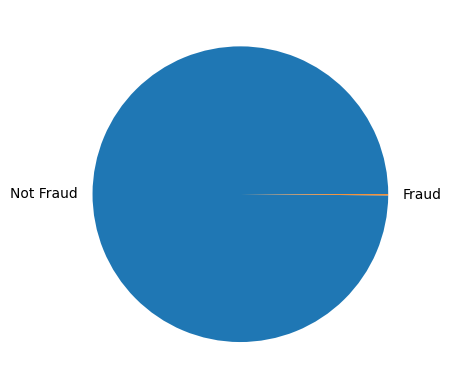

In [9]:
#Check if data is balanced before SMOTE
labels = 'Not Fraud','Fraud'
values=df['isFraud'].value_counts()
fig, ax = plt.subplots()
ax.pie(values, labels=labels);

In [10]:
# summarize class distribution
counter = collections.Counter(y)
print(counter)

Counter({0: 6354407, 1: 8213})


In [11]:
X_train.shape, y_train.shape

((5090096, 16), (5090096,))

In [12]:
X_resampled_SMOTE, y_resampled_SMOTE = SMOTE().fit_resample(X_train, y_train)

In [13]:
X_resampled_SMOTE.head()

,step,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,619,386385.08,4449199,4669568.85,5055953.92,289167,506035.06,119649.98,0,772770.15,0.00,1,0,0,0,0
1,164,212458.78,5813773,234635.00,447093.78,204382,806037.88,593579.10,0,424917.56,0.00,1,0,0,0,0
2,382,19967.60,5870502,3634.00,0.00,1346491,0.00,0.00,0,16333.60,19967.60,0,0,0,1,0
3,180,527616.51,5095916,180216.00,0.00,446948,92157.10,619773.61,0,347400.51,1055233.02,0,1,0,0,0
4,36,206067.85,5557736,0.00,0.00,338417,2131494.48,2337562.32,0,206067.85,412135.69,0,0,0,0,1


In [14]:
X_resampled_SMOTE.shape, y_resampled_SMOTE.shape

((10167006, 16), (10167006,))

In [15]:
pd.DataFrame(y_resampled_SMOTE)

,isFraud
0,0
1,0
2,0
3,0
4,0
...,...
10167001,1
10167002,1
10167003,1
10167004,1


### SMOTE on  test dataset (50/50 split)

In [17]:
X_test_resampled_SMOTE, y_test_resampled_SMOTE = SMOTE(sampling_strategy= 0.5).fit_resample(X_test, y_test)

In [18]:
X_test_resampled_SMOTE.shape, y_test_resampled_SMOTE.shape

((1906356, 16), (1906356,))

#We only added isFraud back in to see what the distribution looks like

In [19]:
X_resampled_SMOTE['isFraud'] = y_resampled_SMOTE

([<matplotlib.patches.Wedge at 0x124235630>,
 [Text(6.735557395310444e-17, 1.1, 'Not Fraud'),
  Text(-2.0206672185931328e-16, -1.1, 'Fraud')])

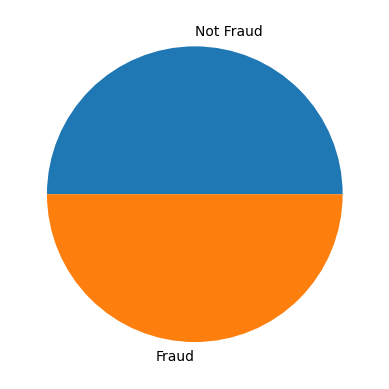

In [20]:
#Check if data is balanced after SMOTE balancing
labels = 'Not Fraud','Fraud'
values=X_resampled_SMOTE['isFraud'].value_counts()
fig, ax = plt.subplots()
ax.pie(values, labels=labels)

### ADASYN

In [21]:
X_resampled_ADASYN, y_resampled_ADASYN = ADASYN().fit_resample(X_train, y_train)

In [22]:
X_resampled_ADASYN['isFraud'] = y_resampled_ADASYN

([<matplotlib.patches.Wedge at 0x134a16530>,
 [Text(-7.724207452182517e-05, 1.099999997288028, 'Not Fraud'),
  Text(7.713908508922867e-05, -1.0999999972952552, 'Fraud')])

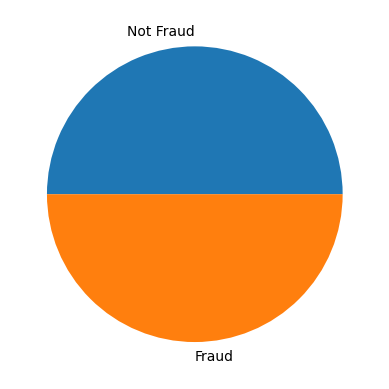

In [23]:
#Check if data is balanced after ADASYN balancing
import matplotlib.pyplot as plt
labels = 'Not Fraud','Fraud'
values=X_resampled_ADASYN['isFraud'].value_counts()
fig, ax = plt.subplots()
ax.pie(values, labels=labels)

### Logistic regression using SMOTE data

In [88]:
logreg = LogisticRegression()

In [89]:
X_resampled_SMOTE['isFraud'] = y_resampled_SMOTE

In [90]:
fraud = X_resampled_SMOTE[X_resampled_SMOTE.isFraud == 1].sample(100000)
notfraud = X_resampled_SMOTE[X_resampled_SMOTE.isFraud == 0].sample(100000)
data_new_sample = pd.concat([fraud, notfraud], axis=0)

In [91]:
data_new_sample.head()

,step,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFlaggedFraud,errorBalanceOrig,errorBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
6639011,287,1.103664e+05,5024590,1.103664e+05,0.000000e+00,483138,6.338812e+06,6.449179e+06,0,0.000000e+00,2.207328e+05,0,1,0,0,0,1
8615528,714,3.408498e+05,3979662,3.408498e+05,0.000000e+00,140585,8.742250e+04,4.282723e+05,0,0.000000e+00,6.816996e+05,0,1,0,0,0,1
7534287,399,4.830399e+06,6054129,4.830399e+06,4.830399e+06,518076,0.000000e+00,0.000000e+00,1,4.830399e+06,4.830399e+06,0,0,0,0,1,1
8285565,159,3.935208e+04,4160004,3.935208e+04,0.000000e+00,470519,9.253474e+03,4.935749e+03,0,0.000000e+00,3.503435e+04,0,1,0,0,0,1
10147049,107,4.329685e+05,880685,7.879989e+04,0.000000e+00,343733,9.271584e+03,4.422401e+05,0,3.541686e+05,8.659370e+05,0,1,0,0,0,1


In [92]:
X_resampled_SMOTE_data_new_sample = data_new_sample.drop('isFraud', axis=1)

In [93]:
y_resampled_SMOTE_data_new_sample = data_new_sample['isFraud']

In [94]:
# Train the model on the Training data
log_model_SMOTE = logreg.fit(X_resampled_SMOTE_data_new_sample, y_resampled_SMOTE_data_new_sample)

/Users/leahredon/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [95]:
y_pred = log_model_SMOTE.predict(X_test_resampled_SMOTE)

In [96]:
# Score the model on the Test data
recall = recall_score(y_test_resampled_SMOTE, y_pred)
print("Recall SMOTE:", recall)

Recall SMOTE: 0.9491401396171544


### Feature selection on SMOTE data

In [34]:
permutation_score = permutation_importance(log_model_SMOTE, X_resampled_SMOTE_data_new_sample, y_resampled_SMOTE_data_new_sample, n_repeats=10, scoring = 'recall') # Perform Permutation"
importance_df = pd.DataFrame(np.vstack((X.columns, permutation_score.importances_mean)).T) # Unstack results"
importance_df.columns=['feature','score_decrease']
importance_df.sort_values(by='score_decrease', ascending = False) # Order by importance"

,feature,score_decrease
7,newBalanceDest,0.19402
1,amount,0.191451
3,oldBalanceOrig,0.168275
10,errorBalanceDest,0.143019
6,oldBalanceDest,0.095331
4,newBalanceOrig,0.083708
9,errorBalanceOrig,0.071942
5,nameDest,0.05016
0,step,0.008372
2,nameOrig,0.00061


### Only Keeping important features and re running model

We are only keeping: newBalanceDest, amount, oldBalanceOrig, errorBalanceDest

In [60]:
X_resampled_SMOTE_data_new_sample_imp_feat = data_new_sample.loc[:, ['newBalanceDest','amount', 'oldBalanceOrig', 'errorBalanceDest']]


In [61]:
X_resampled_SMOTE_data_new_sample_imp_feat.head()

,newBalanceDest,amount,oldBalanceOrig,errorBalanceDest
9146592,0.000000e+00,4.467943e+05,4.467943e+05,4.467943e+05
8476476,3.611294e+06,3.574384e+06,3.574384e+06,7.148768e+06
9704875,0.000000e+00,2.335014e+06,2.335014e+06,2.335014e+06
9403869,1.600114e+06,7.591985e+05,7.591985e+05,1.604133e+06
5722541,3.187632e+05,4.925413e+04,4.925413e+04,9.850825e+04


In [52]:
X_test_resampled_SMOTE_imp_feat = X_test_resampled_SMOTE.loc[:, ['newBalanceDest','amount', 'oldBalanceOrig', 'errorBalanceDest']]

In [56]:
y_resampled_SMOTE_data_new_sample_imp_feat = data_new_sample['isFraud']

In [57]:
log_model_SMOTE = logreg.fit(X_resampled_SMOTE_data_new_sample_imp_feat, y_resampled_SMOTE_data_new_sample_imp_feat)

In [58]:
y_pred = log_model_SMOTE.predict(X_test_resampled_SMOTE_imp_feat)

In [59]:
# Score the model on the Test data
recall = recall_score(y_test_resampled_SMOTE, y_pred)
print("Recall SMOTE:", recall)

Recall SMOTE: 0.9049243687957549


### Confusion matrix

In [73]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_resampled_SMOTE, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1270676     228]
 [   1823  633629]]

True Positives(TP) =  1270676

True Negatives(TN) =  633629

False Positives(FP) =  228

False Negatives(FN) =  1823


<AxesSubplot:>

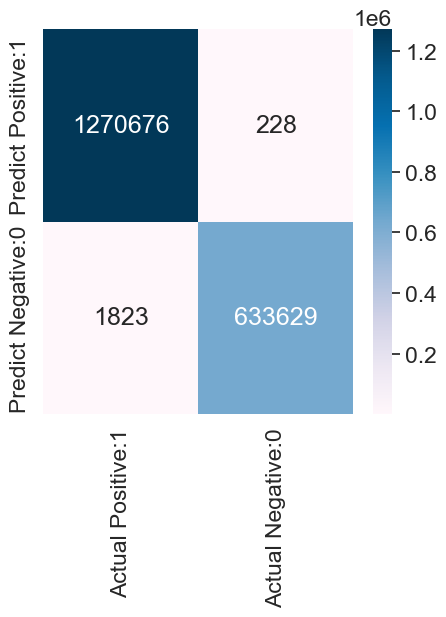

In [74]:
confusion_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

fig, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap = 'PuBu', ax = ax)

In [77]:
!pip install scikit-plot


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: pip install --upgrade pip


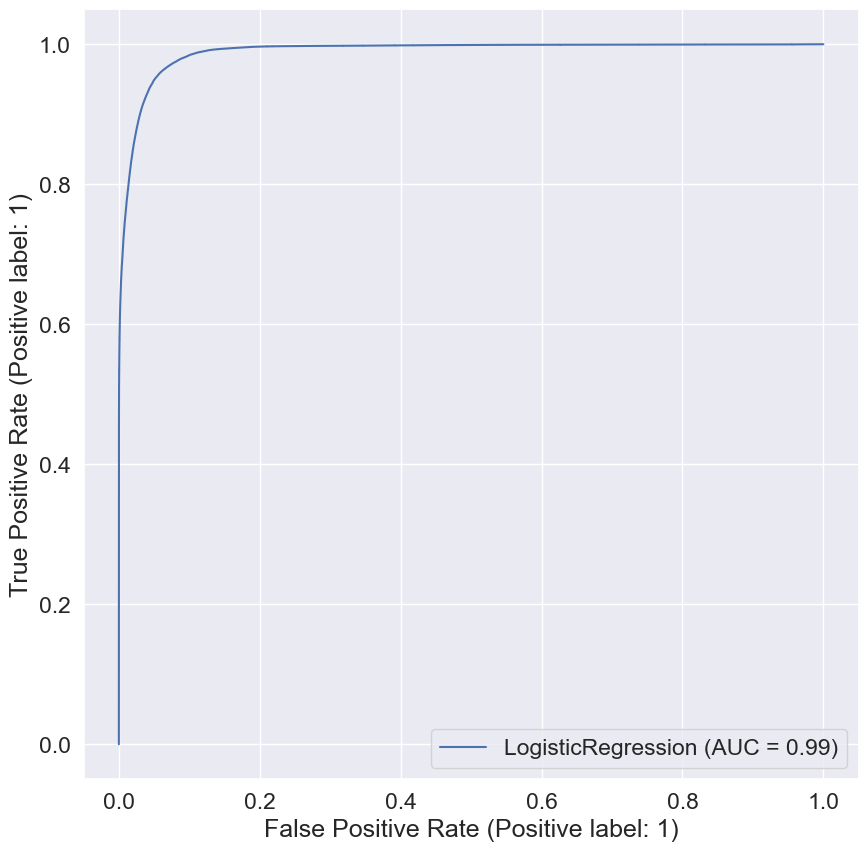

In [105]:
RocCurveDisplay.from_estimator(logreg, X_test_resampled_SMOTE, y_test_resampled_SMOTE)
plt.show()

### Logisitc Regression using ADASYN data

In [32]:
X_resampled_ADASYN = X_resampled_ADASYN.drop('isFraud', axis=1)

In [33]:
# Train the model on the Training data
log_model_ADASYN = logreg.fit(X_resampled_ADASYN, y_resampled_ADASYN)

/Users/leahredon/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
y_pred = log_model_ADASYN.predict(X_test)

In [35]:
# Score the model on the Test data
recall = recall_score(y_test, y_pred)
print("Recall ADASYN:", recall)

Recall ADASYN: 0.9604938271604938


### Feature selection on ADASYN

In [ ]:
permutation_score = permutation_importance(log_model_ADASYN, X_resampled_SMOTE, y_resampled_SMOTE, n_repeats=10, scoring = 'recall') # Perform Permutation"
importance_df = pd.DataFrame(np.vstack((X.columns, permutation_score.importances_mean)).T) # Unstack results"
importance_df.columns=['feature','score_decrease']
importance_df.sort_values(by='score_decrease', ascending = False) # Order by importance"

### SVM Classifcation Model

#### SMOTE

In [31]:
classifier = svm.SVC(kernel='linear') # We set a SVM classifier, the default SVM Classifier (Kernel = Radial Basis Function)

In [ ]:
classifier.fit(X_resampled_SMOTE_data_new_sample, y_resampled_SMOTE_data_new_sample) # Then we train our model, with our balanced data train.

In [ ]:
prediction_SVM_all = classifier.predict(X_test_resampled_SMOTE) #We predict our data test.

In [ ]:
#Looking at Gamma for curvature in decision boundary
#Apply SVM model using most commom kernel functions: Gaussian radial basis function (RBF)

rbf_svc=SVC(kernel='rbf').fit(X_resampled_SMOTE, y_resampled_SMOTE)
y_pred = rbf_svc.predict(X_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

In [ ]:
cm = confusion_matrix(y_test, prediction_SVM_all) #predicted positives/negatives vs actual positives/negatives
plot_confusion_matrix(cm,class_names)

## XGBoost Model

In [62]:
# Extreme Gradient Boosting algorithm
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
XGboostmodel = XGBClassifier()
XGboostmodel.fit(X_resampled_SMOTE_data_new_sample, y_resampled_SMOTE_data_new_sample)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [114]:
from sklearn.metrics import recall_score
from sklearn.metrics import mean_absolute_error

y_pred_XGBoost = XGboostmodel.predict(X_test_resampled_SMOTE)
baseline_predictions = [round(value) for value in y_pred]

# Compute MAE
mae_baseline = mean_absolute_error(y_test_resampled_SMOTE, baseline_predictions)
# Compute accuracy
accuracy = accuracy_score(y_test_resampled_SMOTE, baseline_predictions)
recall = recall_score(y_test_resampled_SMOTE, y_pred_XGBoost)
print("Recall:", recall)
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("mae_baseline: %.2f%%" % (mae_baseline * 100.0))

Recall: 0.9971311759188735
mae_baseline: 0.11%


In [64]:
permutation_score = permutation_importance(XGboostmodel, X_resampled_SMOTE_data_new_sample, y_resampled_SMOTE_data_new_sample, n_repeats=10, scoring = 'recall') # Perform Permutation"
importance_df = pd.DataFrame(np.vstack((X.columns, permutation_score.importances_mean)).T) # Unstack results"
importance_df.columns=['feature','score_decrease']
importance_df.sort_values(by='score_decrease', ascending = False) # Order by importance"

,feature,score_decrease
9,errorBalanceOrig,0.233378
4,newBalanceOrig,0.143685
1,amount,0.014854
2,nameOrig,0.003054
3,oldBalanceOrig,0.002937
5,nameDest,0.002101
0,step,0.001583
7,newBalanceDest,0.001501
6,oldBalanceDest,0.001439
10,errorBalanceDest,0.001097


In [120]:
from sklearn.metrics import confusion_matrix
cm_XGBoost = confusion_matrix(y_test_resampled_SMOTE, y_pred_XGBoost)
print('Confusion matrix\n\n', cm_XGBoost)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1270676     228]
 [   1823  633629]]

True Positives(TP) =  1270676

True Negatives(TN) =  633629

False Positives(FP) =  228

False Negatives(FN) =  1823


<AxesSubplot:>

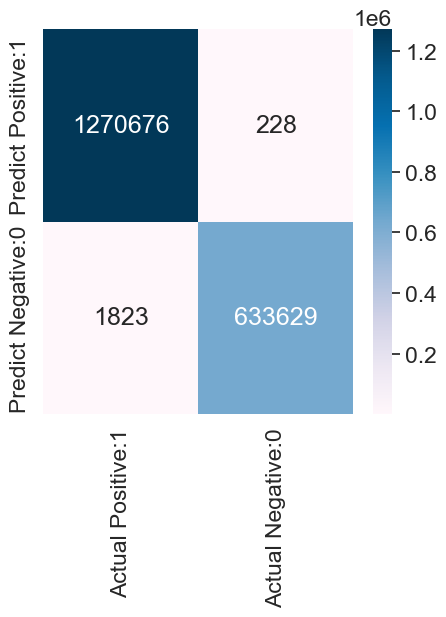

In [121]:
confusion_matrix = pd.DataFrame(data=cm_XGBoost, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

fig, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap = 'PuBu', ax = ax)

Text(0.5, 1.0, 'Ordering of features by importance to the model learnt')

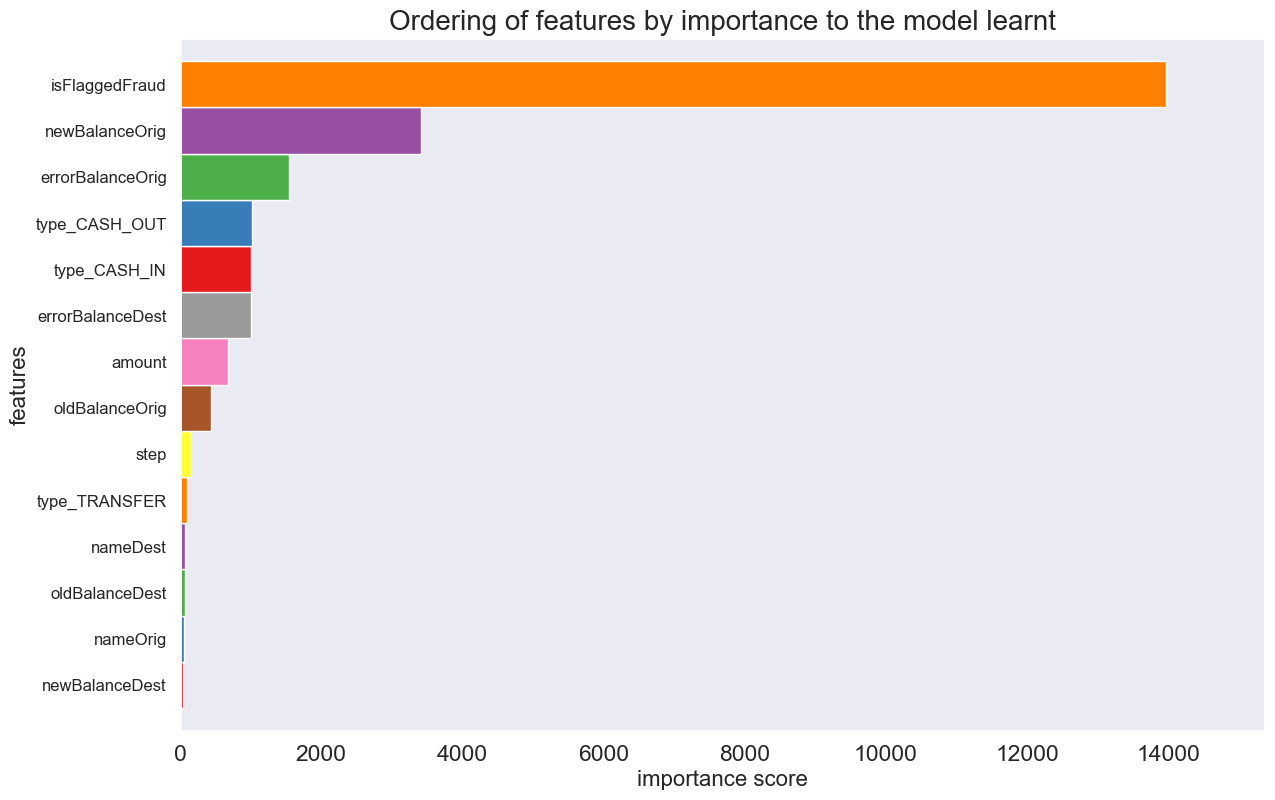

In [123]:
from xgboost import plot_importance, to_graphviz
fig = plt.figure(figsize = (14, 9))
ax = fig.add_subplot(111)

colours = plt.cm.Set1(np.linspace(0, 1, 9))

ax = plot_importance(XGboostmodel, height = 1, color = colours, grid = False, \
                     show_values = False, importance_type = 'cover', ax = ax);
for axis in ['top','bottom','left','right']:
            ax.spines[axis].set_linewidth(2)
        
ax.set_xlabel('importance score', size = 16);
ax.set_ylabel('features', size = 16);
ax.set_yticklabels(ax.get_yticklabels(), size = 12);
ax.set_title('Ordering of features by importance to the model learnt', size = 20)

## Drop isFlaggedFraud

In [126]:
df_new = df.drop('isFlaggedFraud', axis=1)

In [127]:
df_new.head()

,step,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,isFraud,errorBalanceOrig,errorBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,757869,170136.0,160296.36,1662094,0.0,0.0,0,0.0,9839.64,0,0,0,1,0
1,1,1864.28,2188998,21249.0,19384.72,1733924,0.0,0.0,0,0.0,1864.28,0,0,0,1,0
2,1,181.00,1002156,181.0,0.00,439685,0.0,0.0,1,0.0,181.00,0,0,0,0,1
3,1,181.00,5828262,181.0,0.00,391696,21182.0,0.0,1,0.0,-21001.00,0,1,0,0,0
4,1,11668.14,3445981,41554.0,29885.86,828919,0.0,0.0,0,0.0,11668.14,0,0,0,1,0


In [139]:
# Separate the features and target variable
X_no_flag = df_new.drop('isFraud', axis=1)
y_no_flag = df_new['isFraud']

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_no_flag, y_no_flag, test_size=0.2, random_state=42)

In [141]:
X_resampled_SMOTE, y_resampled_SMOTE = SMOTE().fit_resample(X_train, y_train)

In [142]:
X_test_resampled_SMOTE, y_test_resampled_SMOTE = SMOTE(sampling_strategy= 0.5).fit_resample(X_test, y_test)

In [143]:
X_resampled_SMOTE['isFraud'] = y_resampled_SMOTE

In [144]:
logreg = LogisticRegression()

In [145]:
X_resampled_SMOTE['isFraud'] = y_resampled_SMOTE

In [146]:
fraud = X_resampled_SMOTE[X_resampled_SMOTE.isFraud == 1].sample(100000)
notfraud = X_resampled_SMOTE[X_resampled_SMOTE.isFraud == 0].sample(100000)
data_new_sample = pd.concat([fraud, notfraud], axis=0)

In [147]:
data_new_sample.head()

,step,amount,nameOrig,oldBalanceOrig,newBalanceOrig,nameDest,oldBalanceDest,newBalanceDest,errorBalanceOrig,errorBalanceDest,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,isFraud
5129540,366,1.757065e+06,2420994,1.757065e+06,0.0,440538,2.103719e+06,3.860784e+06,0.0,3.514130e+06,0,1,0,0,0,1
6534232,445,1.420151e+06,1414774,1.420151e+06,0.0,410455,0.000000e+00,0.000000e+00,0.0,1.420151e+06,0,0,0,0,1,1
6609906,693,2.157709e+05,5915440,2.157709e+05,0.0,249338,0.000000e+00,0.000000e+00,0.0,2.157709e+05,0,0,0,0,1,1
9646594,369,1.154985e+06,4076021,1.154985e+06,0.0,318295,3.642970e+06,4.797955e+06,0.0,2.309969e+06,0,1,0,0,0,1
8137039,421,3.469526e+05,3635042,3.469526e+05,0.0,353056,0.000000e+00,3.469526e+05,0.0,6.939053e+05,0,1,0,0,0,1


In [148]:
X_resampled_SMOTE_data_new_sample = data_new_sample.drop('isFraud', axis=1)

In [149]:
y_resampled_SMOTE_data_new_sample = data_new_sample['isFraud']

In [150]:
log_model_SMOTE = logreg.fit(X_resampled_SMOTE_data_new_sample, y_resampled_SMOTE_data_new_sample)

/Users/leahredon/.pyenv/versions/3.10.6/envs/lewagon/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [151]:
y_pred = log_model_SMOTE.predict(X_test_resampled_SMOTE)

In [152]:
# Score the model on the Test data
recall = recall_score(y_test_resampled_SMOTE, y_pred)
print("Recall SMOTE:", recall)

Recall SMOTE: 0.9512598905975589


In [156]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test_resampled_SMOTE, y_pred)
print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[1204531   66373]
 [  30972  604480]]

True Positives(TP) =  1204531

True Negatives(TN) =  604480

False Positives(FP) =  66373

False Negatives(FN) =  30972


<AxesSubplot:>

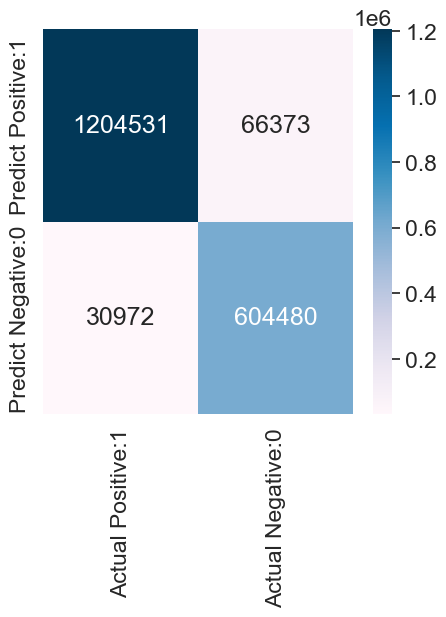

In [157]:
confusion_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

fig, ax = plt.subplots(figsize=(5,5)) 
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap = 'PuBu', ax = ax)

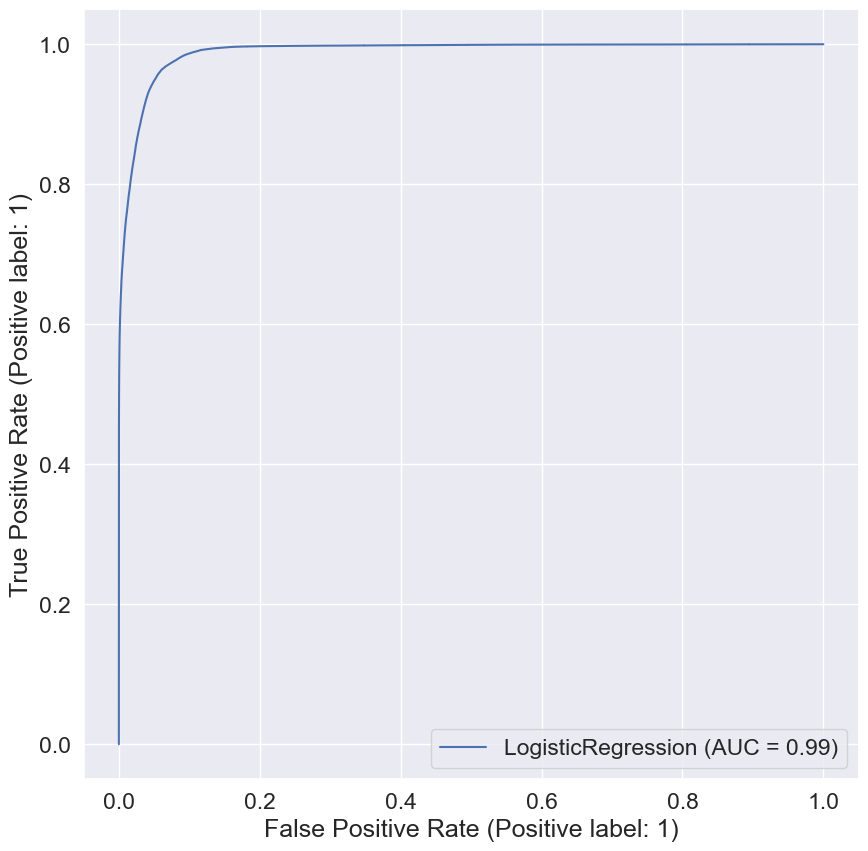

In [158]:
RocCurveDisplay.from_estimator(logreg, X_test_resampled_SMOTE, y_test_resampled_SMOTE)
plt.show()